# Loading and saving averaged time images for suite2p dataset
* 1/9/2024 setup

In [1]:
import sys, os
import matplotlib.pyplot as plt
from os.path import join
import numpy as np
import pandas as pd

sys.path.append("/home/gergely/code/sleep/base/")

from suite2p_class import Suite2p
from mouse_class import Mouse

In [2]:
mouse = Mouse("140302_3")
s2p_folders = mouse.find_suite2p_folders()
for folder in enumerate(s2p_folders):
    print(folder)

Searching for suite2p folders in /data2/gergely/invivo_DATA/sleep/140302_3
(0, '/data2/gergely/invivo_DATA/sleep/140302_3/12_21/TSeries-12212023-1051-001/TSeries-12212023-1051-001.sima/suite2p')
(1, '/data2/gergely/invivo_DATA/sleep/140302_3/12_21/TSeries-12212023-1051-002/TSeries-12212023-1051-002.sima/suite2p')
(2, '/data2/gergely/invivo_DATA/sleep/140302_3/12_11/TSeries-12112023-0825_sess01-001/TSeries-12112023-0825_sess01-001_Cycle00001_Element00001.sima/suite2p')
(3, '/data2/gergely/invivo_DATA/sleep/140302_3/12_11/TSeries-12112023-0825_sess02_MC-002/TSeries-12112023-0825_sess02_MC-002.sima/suite2p')
(4, '/data2/gergely/invivo_DATA/sleep/140302_3/12_13/TSeries-12132023-0849_GC_MC-003/TSeries-12132023-0849_GC_MC-003.sima/suite2p')
(5, '/data2/gergely/invivo_DATA/sleep/140302_3/12_13/TSeries-12132023-0849_GC_dendrite-004/TSeries-12132023-0849_GC_dendrite-004.sima/suite2p')
(6, '/data2/gergely/invivo_DATA/sleep/140302_3/12_13/TSeries-12132023-0849_GC-002/TSeries-12132023-0849_GC-002.

### Procedure to be implemented in the class:

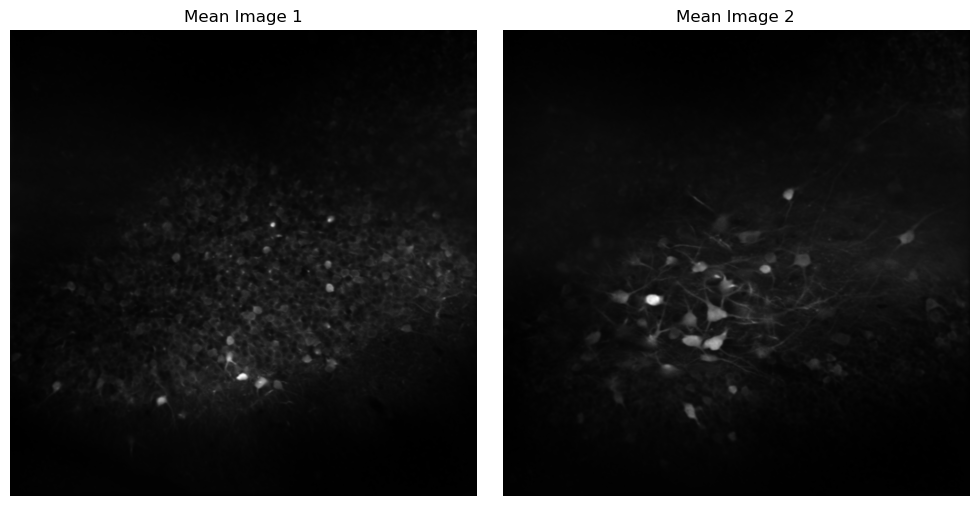

In [3]:
s2p_folder = s2p_folders[4]
ops_path = join(s2p_folder, "ops1.npy")
ops_array = np.load(ops_path, allow_pickle=True)

# Check the number of elements in ops_array
num_elements = len(ops_array)

# Define a consistent plot size for both scenarios
plot_width_per_image = 5  # Width per image in inches
plot_height_per_image = 5  # Height per image in inches

# Single element handling
if num_elements == 1:
    fig, ax = plt.subplots(figsize=(plot_width_per_image, plot_height_per_image))
    image_data = ops_array[0]["meanImg"]
    ax.imshow(
        image_data, cmap="gray"
    )  # cmap='gray' for grayscale, remove if your images are in color
    ax.set_title("Mean Image")
    ax.axis("off")

# Multiple elements handling
else:
    # Set up the subplot grid
    cols = int(np.ceil(np.sqrt(num_elements)))
    rows = int(np.ceil(num_elements / cols))

    # Calculate the total plot size
    total_width = plot_width_per_image * cols
    total_height = plot_height_per_image * rows

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(total_width, total_height))
    axes = axes.flatten()

    # Loop through each item and plot
    for i, ops in enumerate(ops_array):
        image_data = ops["meanImg"]
        axes[i].imshow(image_data, cmap="gray")
        axes[i].set_title(f"Mean Image {i+1}")
        axes[i].axis("off")

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

plt.tight_layout()
plt.show()

### Calling the implementation:

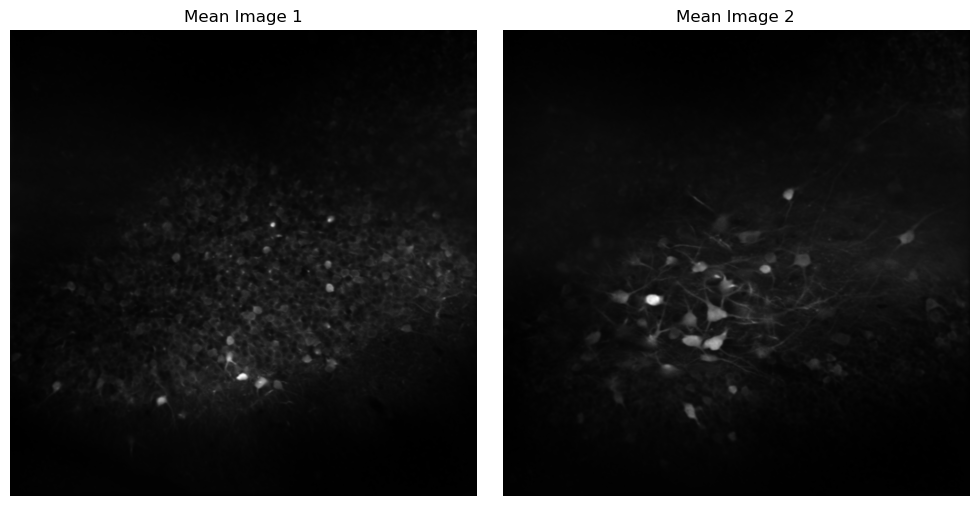

In [4]:
s2p = Suite2p(s2p_folder)
s2p.time_avg_image()